# Mini project 2

In [2]:
from data import load_dataset, filter_dataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler


In [3]:
# Import dataset
X_full,y_full = load_dataset()
X,y = filter_dataset(X_full,y_full,"1,7")
print(X.shape)
print(y.shape)

(15170, 784)
(15170,)


In [4]:
np.sqrt(X.shape[1])

np.float64(28.0)

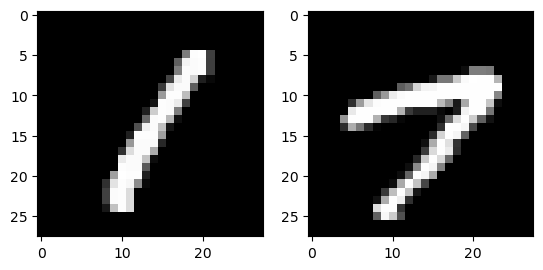

In [12]:
# Plot the squared images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(X[0].reshape(28,28), cmap='gray')
ax[1].imshow(X[45].reshape(28,28), cmap='gray')
plt.show()

In [62]:
# Perform PCA on the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("Total variance capture by PCA: ", sum(pca.explained_variance_ratio_))
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

Total variance capture by PCA:  0.368514884597662


Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

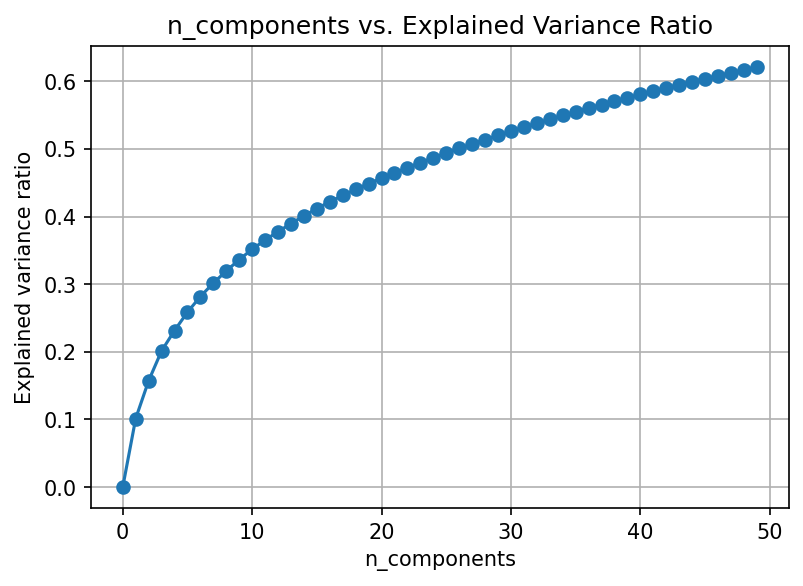

In [ ]:
# Study effect of n_components on explained variance ratio
nums = np.arange(50)
 
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  X_pca = pca.fit_transform(X)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(6,4),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [64]:
# LDA proves to be much better, since we care more about class separation and nor variance
lda = LinearDiscriminantAnalysis(n_components=1)
Xs = StandardScaler().fit_transform(X)
X_lda = lda.fit_transform(Xs, y)
print("Total variance capture by LDA: ", sum(lda.explained_variance_ratio_))
print("New feature-space shape: ", X_lda.shape)

Total variance capture by LDA:  1.0
New feature-space shape:  (15170, 1)


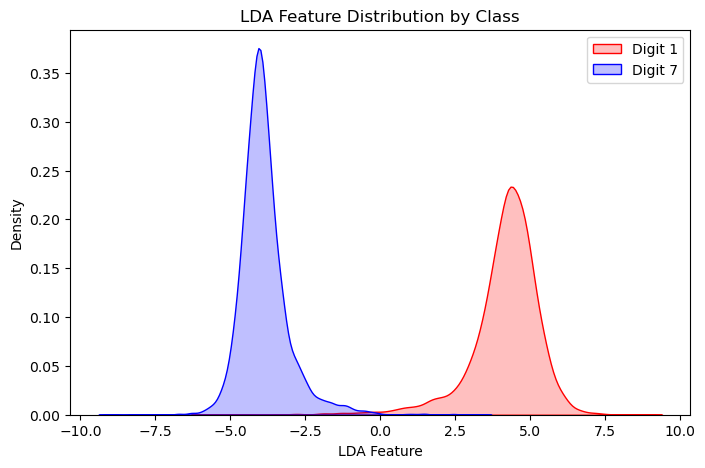

In [ ]:
# Plot LDA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plot along a single axis (1D)
plt.figure(figsize=(8, 5))
sns.kdeplot(x=X_lda.ravel(), hue=y, fill=True, palette=['blue', 'red'])
plt.xlabel("LDA Feature")
plt.ylabel("Density")
plt.title("LDA Feature Distribution by Class")
plt.legend(["Digit 1", "Digit 7"])
plt.show()